In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [4]:
path_train = "/content/drive/MyDrive/deep learning/train.csv"
path_test = "/content/drive/MyDrive/deep learning/test.csv"

In [5]:
data = pd.read_csv(path_train,delimiter=',', index_col=False)
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.iloc[:,1:]
X = np.array(X)
X = X.astype('float').reshape(X.shape[0], 28, 28)

Y = data.iloc[:,0].astype('int')
Y = np.array(Y)

print(X.shape, Y.shape)

(42000, 28, 28) (42000,)


In [7]:
data_test = pd.read_csv(path_test,delimiter=',', index_col=False)
data_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
X_testing = np.array(data_test)
X_testing = X_testing.astype('float').reshape(X_testing.shape[0], 28, 28)

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape, X_test.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1)


In [11]:
model = Sequential()
model.add(Conv2D(256,(7,7),strides=(1, 1), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(256,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(Conv2D(128,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3)) 
model.add(Conv2D(64,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(Conv2D(64,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(Conv2D(64,(7,7),strides=(1, 1), padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       12800     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       3211520   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       1605760   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       802944    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,verbose=1)


Epoch 1/10
263/263 [==============================] - 75s 282ms/step - loss: 0.1112 - accuracy: 0.9732 - val_loss: 0.0821 - val_accuracy: 0.9804
Epoch 2/10
263/263 [==============================] - 74s 281ms/step - loss: 0.0778 - accuracy: 0.9805 - val_loss: 0.0796 - val_accuracy: 0.9831
Epoch 3/10
263/263 [==============================] - 74s 281ms/step - loss: 0.0757 - accuracy: 0.9814 - val_loss: 0.0475 - val_accuracy: 0.9886
Epoch 4/10
263/263 [==============================] - 74s 280ms/step - loss: 0.0707 - accuracy: 0.9821 - val_loss: 0.0486 - val_accuracy: 0.9867
Epoch 5/10
263/263 [==============================] - 74s 280ms/step - loss: 0.0550 - accuracy: 0.9860 - val_loss: 0.0483 - val_accuracy: 0.9882
Epoch 6/10
263/263 [==============================] - 74s 280ms/step - loss: 0.0578 - accuracy: 0.9862 - val_loss: 0.0650 - val_accuracy: 0.9838
Epoch 7/10
263/263 [==============================] - 74s 281ms/step - loss: 0.0595 - accuracy: 0.9854 - val_loss: 0.0523 - val_ac

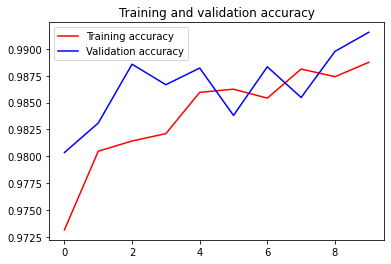

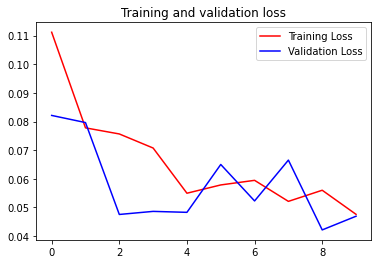

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [15]:
test = X_testing.reshape(X_testing.shape[0],28,28,1)

In [16]:
test_pred = model.predict(test)

In [17]:
labels = [np.argmax(X) for X in test_pred]
image_id = [i+1 for i in range(len(test_pred))]
submission = pd.DataFrame({'ImageId': image_id,
                           'Label': labels},
                          index=None)

submission.to_csv('submission.csv', index=False)


In [18]:
pd.read_csv("submission.csv")

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
